# Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import sys
import copy
import pickle
from sklearn.metrics import normalized_mutual_info_score
from scipy.sparse.csgraph import connected_components
from data_plotting import scatter_plot_matrix, plot_3D_data


sys.path.append('/home/nico/VSCodeRepos/SigMA/')
from SigMA.SigMA import SigMA
from velocity_testing.velocity_test import VelocityTester
from NoiseRemoval.RemoveNoiseTransformed import remove_noise_simple
from generate_data import DataGenerator

# Test Cases Overview & Summary

In [180]:
# contains true split
test_case_1 = [
    {
        'clusters': [0, 1],
        'mu_position': [
            [-500, -500, 20],
            [-490, -490, 35]
        ],
        'mu_std': [
            np.array([3, 5, 2]),
            np.array([4, 8, 2])
        ]
    }
]

# contains true split
test_case_2 = [
    {
        'clusters': [0, 2],
        'mu_position': [
            [20, 40, 150],
            [20, 40, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([6, 5, 5])
        ]
    }
]

# contains true split
test_case_3 = [
    {
        'clusters': [0, 3],
        'mu_position': [
            [-20, 40, 160],
            [-20, 40, 140]
        ],
        'mu_std': [
            np.array([5, 7, 3]),
            np.array([4, 5, 3])
        ]
    }
]

# contains true split
test_case_4 = [
    {
        'clusters': [0, 4],
        'mu_position': [
            [-20, 300, 160],
            [-20, 300, 150]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains true split
test_case_5 = [
    {
        'clusters': [0, 5],
        'mu_position': [
            [-20, 300, 170],
            [-20, 300, 170]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains a few noise splits
test_case_6 = [
    {
        'clusters': [1, 2],
        'mu_position': [
            [-30, -150, 180],
            [-30, -150, 160]
        ],
        'mu_std': [
            np.array([4, 2, 4]),
            np.array([6, 6, 4])
        ]
    }
]

# contains a true split
test_case_7 = [
    {
        'clusters': [1, 3],
        'mu_position': [
            [-30, 150, 180],
            [-30, 150, 160]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 4, 7])
        ]
    }
]

# contains a true split
test_case_8 = [
    {
        'clusters': [1, 4],
        'mu_position': [
            [200, -150, 0],
            [200, -170, 0]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_9 = [
    {
        'clusters': [1, 5],
        'mu_position': [
            [100, 200, -150],
            [100, 200, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_10 = [
    {
        'clusters': [2, 3],
        'mu_position': [
            [-100, 200, -150],
            [-100, 200, -150]
        ],
        'mu_std': [
            np.array([4, 4, 3]),
            np.array([7, 5, 7])
        ]
    }
]

# contains a true split and 2 noise splits
test_case_11 = [
    {
        'clusters': [2, 4],
        'mu_position': [
            [-100, 300, -150],
            [-100, 300, -150]
        ],
        'mu_std': [
            np.array([7, 7, 7]),
            np.array([7, 7, 7])
        ]
    }
]

# contains 5 noise spilts
test_case_12 = [
    {
        'clusters': [2, 5],
        'mu_position': [
            [-100, 400, -150],
            [-100, 400, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]
    }
]

# contains a few noise splits
test_case_13 = [
    {
        'clusters': [3, 4],
        'mu_position': [
            [270, 200, 300],
            [270, 200, 300]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 5])
        ]
    }
]

# contains a few noise splits
test_case_14 = [
    {
        'clusters': [3, 5],
        'mu_position': [
            [260, -100, 200],
            [260, -100, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_15 = [
    {
        'clusters': [0, 0],
        'mu_position': [
            [260, -90, 200],
            [260, -115, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_16 = [
    {
        'clusters': [1, 1],
        'mu_position': [
            [120, 20, 200],
            [120, -10, 200]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 7, 7])
        ]   
    }
]

# can contain a wrong split
test_case_17 = [
    {
        'clusters': [2, 2],
        'mu_position': [
            [400, 400, 400],
            [360, 400, 400]
        ],
        'mu_std': [
            np.array([7, 7, 4]),
            np.array([7, 7, 4])
        ]   
    }
]

# can contain a wrong split
test_case_18 = [
    {
        'clusters': [3, 3],
        'mu_position': [
            [400, 250, 400],
            [400, 265, 400]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]   
    }
]

# can contain a wrong split
test_case_19 = [
    {
        'clusters': [4, 4],
        'mu_position': [
            [-100, 250, 400],
            [-127, 250, 400]
        ],
        'mu_std': [
            np.array([4, 6, 7]),
            np.array([4, 2, 5])
        ]   
    }
]

# can contain a wrong split
test_case_20 = [
    {
        'clusters': [5, 5],
        'mu_position': [
            [200, -350, 150],
            [230, -350, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([3, 3, 5])
        ]   
    }
]

# total about:
# - 10 true splits
# - 10 noise splits
# - 5 wrong splits

# combine the test cases
test_cases = test_case_1 + test_case_2 + test_case_3 + test_case_4 + test_case_5 + test_case_6 + test_case_7 + test_case_8 + test_case_9 + test_case_10 + test_case_11 + test_case_12 + test_case_13 + test_case_14 + test_case_15 + test_case_16 + test_case_17 + test_case_18 + test_case_19 + test_case_20

In [17]:
# save test case summary to file
# with open('simulated_data/test_cases.pkl', 'wb') as f:
#     pickle.dump(test_cases, f)

# Data Creation

In [353]:
data_generator = DataGenerator()
data_no_noise, _ = data_generator.generate_data(test_cases)
data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

Dec out of bounds: Performing correction


In [338]:
cols = ['X', 'Y', 'Z']
# cols = ['ra', 'dec', 'parallax']
# cols = ['U', 'V', 'W']
# cols = ['pmra', 'pmdec', 'radial_velocity']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=labels_true, true_labels=None)

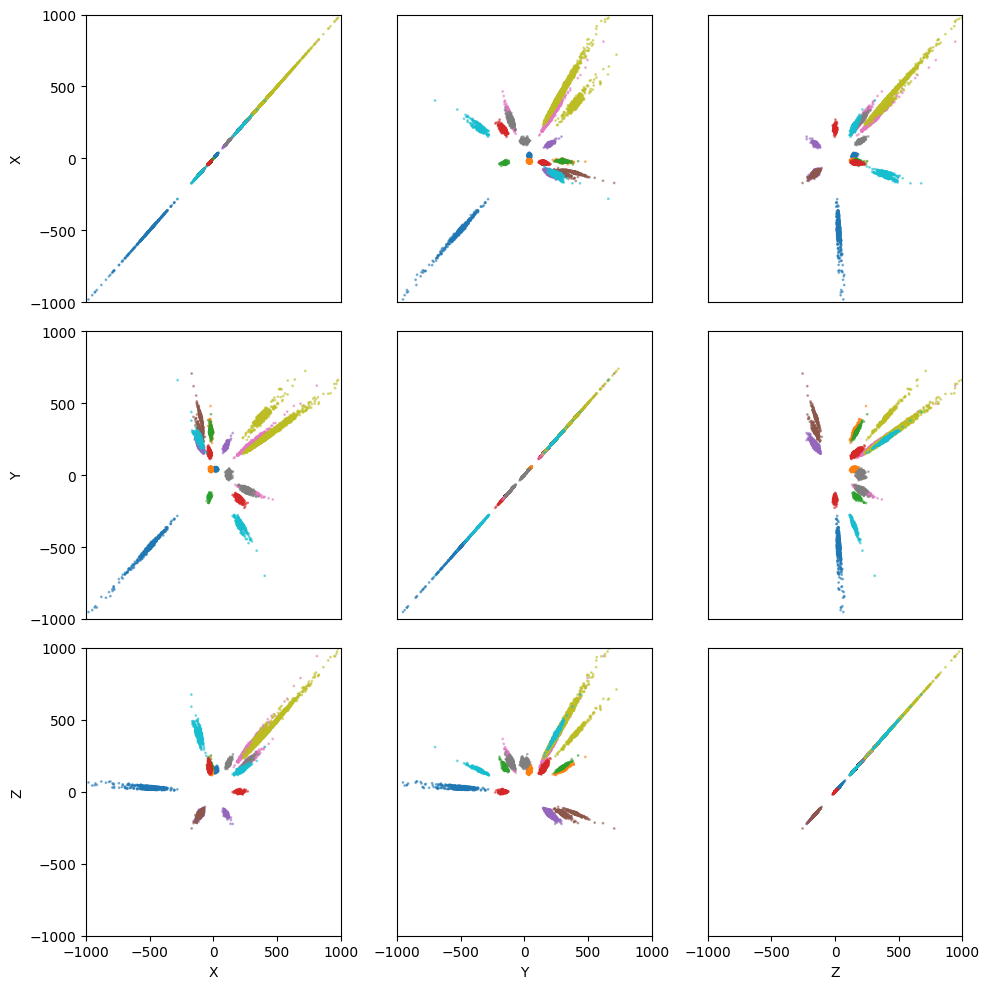

In [354]:
# only plot the true clusters
data_no_noise = copy.deepcopy(data[labels_true != -1])
labels_true_no_noise = copy.deepcopy(labels_true[labels_true != -1])

scatter_plot_matrix(data_no_noise, labels_true_no_noise, cols)

# SigMA Helper Functions

In [355]:
def extract_cluster_single(label_bool_arr, clusterer):
    # Written by Sebastian Ratzenböck
    cluster_bool_array = remove_noise_simple(label_bool_arr, te_obj=clusterer)
    if cluster_bool_array is not None:
        return cluster_bool_array
    else:
        data_idx = np.arange(clusterer.X.shape[0])
        rho = clusterer.weights_[label_bool_arr]
        mad = np.median(np.abs(rho - np.median(rho)))
        threshold = np.median(rho)*0.995 + 3 * mad * 1.05
        # Statistisch fundierterer cut
        # threshold = np.median(rho) + 3 * mad
        idx_cluster = data_idx[label_bool_arr][rho > threshold]
        if len(idx_cluster) > 20:
            # labels_with_noise[idx_cluster] = i
            # Only graph connected points allowed
            _, cc_idx = connected_components(clusterer.A[idx_cluster, :][:, idx_cluster])
            # Combine CCs data points with originally defined dense core (to not miss out on potentially dropped points)
            idx_cluster = data_idx[idx_cluster][cc_idx == np.argmax(np.bincount(cc_idx))]
        
        cluster_bool_array = np.isin(data_idx, idx_cluster)
        return cluster_bool_array
    
def extract_signal(clusterer, labels):
    # Written by Sebastian Ratzenböck
    labels_with_noise = -np.ones(clusterer.X.shape[0], dtype=int)
    for i, u_cl in enumerate(np.unique(labels[labels>-1])):
        cluster_bool_array = extract_cluster_single(labels==u_cl, clusterer)
        labels_with_noise[cluster_bool_array] = i
        
    return labels_with_noise

# Run & Plot SigMA

In [356]:
# cols2fit = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
cols2fit = ['X', 'Y', 'Z', 'U', 'V']
df_fit = copy.deepcopy(data[cols2fit])

In [278]:
# Scale features
sf = {
    'ra': 1/0.64,
    'dec': 1/0.65,
    'parallax': 1/0.15,
    'pmra': 1/0.49,
    'pmdec': 1/0.57
}
for col in cols2fit:
    df_fit[col] *= sf[col]

KeyError: 'X'

In [357]:
sigma_kwargs = dict(
    cluster_features=cols2fit,
    scale_factors=None,
    # These are the default values and should be kept for now
    nb_resampling=0, max_knn_density=101,
    beta=0.99, knn_initcluster_graph=40,
    transform_function=None
)
clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 8.79e-04


In [343]:
cols = ['X', 'Y', 'Z']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=labels_true)
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=None)

# Compute NMI

In [358]:
nmi_data = {}
labels_pred = extract_signal(clusterer, clusterer.labels_)
nmi_data['sigma'] = normalized_mutual_info_score(labels_true, labels_pred)
nmi_data

{'sigma': 0.364500521012009}

In [359]:
np.unique(labels_true, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39]),
 array([50000,   305,   438,   305,   200,   305,  3965,   305,   274,
          305,   200,   438,   200,   438,  3965,   438,   274,   438,
          200,   200,  3965,   200,   274,   200,   200,  3965,   274,
         3965,   200,   305,   305,   438,   438,   200,   200,  3965,
         3965,   274,   274,   200,   200]))

In [360]:
np.unique(clusterer.labels_, return_counts=True)

(array([  121,   200,   319,   908,  1020,  2637,  3853,  3882,  4847,
         5647,  5653,  5724,  5774,  5819,  5894,  6191,  6221,  6236,
         6244,  6376,  6624,  6628,  6680,  6754,  6780,  6891,  6949,
         7715,  7961,  8485,  8576,  8927, 10174, 10473, 10891, 10947,
        11221, 11276, 11647, 11875, 11902, 12031, 12099, 12330, 12391,
        12448, 12529, 12581, 12660, 12729, 12878, 13173, 13332, 13812,
        14167, 14524, 15089, 15236, 15314, 15434, 15614, 15722, 16046,
        16143, 16313, 16951, 17365, 17472, 17674, 17955, 18799, 19817,
        19842, 20366, 20594, 20919, 21159, 21363, 21512, 21746, 21837,
        21899, 22248, 22339, 22389, 22922, 22954, 23142, 23377, 23453,
        24370, 24547, 25016, 25249, 25447, 25923, 25981, 27179, 27258,
        27449, 27502, 27907, 28112, 28264, 28957, 29025, 29782, 30163,
        30230, 30485, 30712, 30998, 31156, 32452, 33665, 35153, 35337,
        35387, 35948, 36416, 36484, 36755, 36900, 37004, 37007]),
 array([145

In [361]:
np.unique(labels_pred, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   6,   7,   8,  12,  13,  15,  17,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  51,  52,  53,  54,  56,  57,  58,  59,  60,  63,  64,
         65,  66,  67,  68,  69,  71,  72,  74,  75,  76,  77,  78,  79,
         81,  82,  83,  85,  89,  94,  95,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 109, 110, 111, 113, 115, 116, 120, 121, 122, 123,
        124]),
 array([74154,   471,   177,    47,    50,   112,     8,    93,   757,
           53,   192,    20,    13,     2,    13,    30,     8,     6,
           98,    73,    12,   821,     3,   118,     2,    51,     2,
           74,   144,   299,    21,    76,    80,     7,   267,    19,
           38,   151,    17,    61,     9,     1,   112,   317,   122,
          110,     6,   286,    23,   426,    26,    83,   171,    74,
          119,    36,    47,   136,    85,   131

# Run Test

In [362]:
def produce_baseline(clusterer):
    _, p_values = clusterer.run_sigma(
        alpha=-np.inf, knn=15, return_pvalues=True
    )
    p_values = np.array(p_values)
    pv_sorted = np.sort(p_values[p_values < 0.05])
    # compute mid point between consecutive p-values
    mid_points = (pv_sorted[1:] + pv_sorted[:-1]) / 2
    return mid_points, clusterer.labels_

mid_points, l0 = produce_baseline(clusterer)

In [349]:
# check whether the needed split happens
l0_copy = np.copy(l0)
for alpha_i in mid_points:
    clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
    l_i = clusterer.labels_
    new_cluster_id = list(set(l_i) - set(l0_copy))
    if len(new_cluster_id) == 1:
        nc_id = new_cluster_id[0]
        part_of_old_cluster = mode(l0_copy[l_i==nc_id], keepdims=False).mode
        print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')

        # check the true labels of the two clusters
        labels_new, count_new = np.unique(labels_true[l_i==nc_id], return_counts=True)
        labels_old, count_old = np.unique(labels_true[l_i==part_of_old_cluster], return_counts=True)

        print(f'    New cluster labels: {labels_new}, counts: {count_new}')
        print(f'    Old cluster labels: {labels_old}, counts: {count_old}')

    l0_copy = np.copy(l_i)

New cluster 2372 from old cluster 150
    New cluster labels: [-1], counts: [21623]
    Old cluster labels: [-1  0  1], counts: [11276    76    55]
New cluster 257 from old cluster 146
    New cluster labels: [-1  0  1], counts: [961 111  68]
    Old cluster labels: [-1  0  1], counts: [16140   118    77]
New cluster 16972 from old cluster 150
    New cluster labels: [-1], counts: [11031]
    Old cluster labels: [-1  0  1], counts: [245  76  55]
New cluster 29606 from old cluster 2372
    New cluster labels: [-1], counts: [118]
    Old cluster labels: [-1], counts: [21505]
New cluster 43234 from old cluster 2372
    New cluster labels: [-1], counts: [436]
    Old cluster labels: [-1], counts: [22642]
New cluster 35846 from old cluster 16972
    New cluster labels: [-1], counts: [756]
    Old cluster labels: [-1], counts: [10275]


In [363]:
def update_labels(labels, label_old, label_new):
    updated_labels = copy.deepcopy(labels)
    updated_labels[labels == label_new] = label_old
    return updated_labels

In [364]:
# copy the data and add labels
data_copy = copy.deepcopy(data)
data_copy['labels'] = labels_true
data_copy.to_csv('/home/nico/Desktop/test_case/data.csv', index=False)

cluster_labels = pd.DataFrame({'sigma': l0})

In [365]:
%reload_ext autoreload
%autoreload 2

test_strategies = [
    'ttest', 
    'bootstrap_range_test',
    'bootstrap_difference_test',
    'xd_mean_distance', 
    'xd_sample_ttest', 
    'xd_mean_distance_sample_distance', 
    'xd_sample_bootstrap_range_test'
]
velocity_tester = VelocityTester(data, clusterer.weights_, 'none', clusterer, err_sampler)

for test_strat in test_strategies:
    print(f'Running test strategy {test_strat}')
    split_info = []
    iteration = 1
    last_alpha = None
    l0 = cluster_labels['sigma'].values
    velocity_tester.update_testing_mode(test_strat)

    # produce the splits for each alpha
    for alpha_i in mid_points:
        # fit clusterer to new alpha
        clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
        l_i = clusterer.labels_
        new_clusters_id = list(set(l_i) - set(l0))

        alpha_difference = alpha_i - last_alpha if last_alpha is not None else None
        loop_count = 0
        while len(new_clusters_id) > 1:
            # update alpha to the mean of the mid points
            new_alpha = last_alpha + alpha_difference

            # fit clusterer to new alpha
            clusterer = clusterer.fit(alpha=new_alpha, knn=15, bh_correction=False)
            l_i = clusterer.labels_
            new_clusters_id = list(set(l_i) - set(l0))

            # update alpha difference
            alpha_difference = alpha_difference / 2

            print(f'New alpha: {new_alpha} Last alpha: {last_alpha}, new clusters: {len(new_clusters_id)}')
            loop_count += 1
            if loop_count > 10:
                break

        if len(new_clusters_id) == 1: 
            # one new cluster was generated
            nc_id = new_clusters_id[0]
            part_of_old_cluster = mode(l0[l_i==nc_id], keepdims=False).mode
            print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')

            # iterate splits
            l_updated = np.copy(l_i)
            for split in reversed(split_info):
                if split['same_velocity'] == True:
                    l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
                    if part_of_old_cluster == split['new_cluster']:
                        print(f'New cluster {nc_id} was updated to old cluster {part_of_old_cluster}')
                        part_of_old_cluster = split['old_cluster']
                    # print(f'New cluster {splits[split]["new_cluster"]} was updated to old cluster {splits[split]["old_cluster"]}')
                        
            # get some information for the report
            labels_nc_id, count_nc_id = np.unique(labels_true[l_updated==nc_id], return_counts=True)
            print(f'New cluster {nc_id} has the following true labels: {labels_nc_id} with counts {count_nc_id}')
            labels_part_of_old_cluster, count_part_of_old_cluster = np.unique(labels_true[l_updated==part_of_old_cluster], return_counts=True)
            print(f'Old cluster {part_of_old_cluster} has the following true labels: {labels_part_of_old_cluster} with counts {count_part_of_old_cluster}')
            
            # if both clusters only have labels -1, skip the velocity test as otherwise testing would take too long
            same_velocity = False
            test_output = 'none'
            if len(labels_nc_id) == 1 and labels_nc_id[0] == -1 and len(labels_part_of_old_cluster) == 1 and labels_part_of_old_cluster[0] == -1:
                print('Skipping velocity test')
                same_velocity = True
                test_output = 'skipped'
                mean_deviation = 0
                stats = None
            else:
                test_output, mean_deviation, stats = velocity_tester.run_test(l_updated, part_of_old_cluster, nc_id, clusterer, return_stats=True)
                same_velocity = test_output
                test_output = 'same velocity' if test_output else 'different velocity'

                # check if the mean_deviation is larger than 10
                print(mean_deviation)
                if max(mean_deviation) > 10:
                    same_velocity = True
                    test_output += ' deviation overwrite'



            split_info.append({
                'new_cluster': nc_id,
                'old_cluster': part_of_old_cluster,
                'alpha': alpha_i,
                'same_velocity': same_velocity,
                'test_output': test_output,
                'mean_deviation': mean_deviation,
                'stats': stats,
                'labels_nc_id': labels_nc_id,
                'count_nc_id': count_nc_id,
                'labels_part_of_old_cluster': labels_part_of_old_cluster,
                'count_part_of_old_cluster': count_part_of_old_cluster
            })

            print(f'Test output: {test_output}, same velocity: {same_velocity}, mean deviation: {mean_deviation}')


        else:
            print('No or more than 1 new cluster')
        iteration += 1
        l0 = np.copy(l_i)
        last_alpha = alpha_i
        print('-------------------\n')
    print('--- Finished Testing Strategy ---\n')


    # quicksave the labels to a csv file
    cluster_labels.to_csv('/home/nico/Desktop/test_case/cluster_labels.csv', index=False)
    # save the split info with pickle
    with open(f'/home/nico/Desktop/test_case/split_info_{test_strat}.pkl', 'wb') as f:
        pickle.dump(split_info, f)

    # compute nmi
    clusterer = clusterer.fit(alpha=mid_points[-1], knn=15, bh_correction=False)  
    labels = clusterer.labels_
    l_updated = np.copy(labels)
    for split in reversed(split_info):
        if split['same_velocity'] == True:
            l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
    cluster_labels[test_strat] = l_updated

    labels_pred = extract_signal(clusterer, l_updated)
    nmi_data[test_strat] = normalized_mutual_info_score(labels_true, labels_pred)

    # save the nmi data to a csv file
    nmi_df = pd.DataFrame(nmi_data.items(), columns=['strategy', 'nmi'])
    nmi_df.to_csv('/home/nico/Desktop/test_case/nmi.csv', index=False)

Running test strategy ttest
No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 15614 from old cluster 15722
New cluster 15614 has the following true labels: [-1  5 13 15 18 19 20 21 22 23 37 38] with counts [  29    1    2    1   70 1419   76   81   73   74    1    4]
Old cluster 15722 has the following true labels: [-1 13 18 19 20 21 22 23 38 39] with counts [10989     1   130  2545    75    95    68    61     2     1]
[2.868298956734439, 166.3104228065742]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.868298956734439, 166.3104228065742]
-------------------

New cluster 15089 from old cluster 15722
New cluster 15089 has the following true labels: [-1 13 18 19 20 21 22 23 38 39] with counts [ 28   1  44 879  48  61  45  35   2   1]
Old cluster 15722 has the following true labels: [-1  5 13 15 18 19 20 21 22 23 37 38] with counts [10990     1     2     1   156  3085   103   115    96   100     1     4]
[2.797153664691267, 143.43310778225734]
Test output: different velocity deviation overwrite, same velocit

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 20366 from old cluster 21899
New cluster 20366 has the following true labels: [-1  2  3 24 25 30 32 33 34 35] with counts [  2   1   1 842  62   1  12  10  43  46]
Old cluster 21899 has the following true labels: [-1  2 24 25 32 33 34 35] with counts [   2    1 2910  193    8   17  124  124]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 319 from old cluster 121
New cluster 319 has the following true labels: [-1  0  1 16] with counts [32 16 35  1]
Old cluster 121 has the following true labels: [-1  0  1] with counts [14279   287   403]
[2.1907267721082913, 194.25140777282675]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.1907267721082913, 194.25140777282675]
-------------------

New cluster 19842 from old cluster 21899
New cluster 19842 has the following true labels: [24 25 34 35] with counts [134  13  16   9]
Old cluster 21899

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 31156 from old cluster 35153
New cluster 31156 has the following true labels: [-1 24 25 32 33 34 35] with counts [  5  19   3  16  11 364 332]
Old cluster 35153 has the following true labels: [-1  0 17 24 25 30 32 33 34 35] with counts [14179     2     1   194    16     1   108   104  3434  3463]
[2.4914583493796703, 4.92673125821175]
Test output: different velocity, same velocity: False, mean deviation: [2.4914583493796703, 4.92673125821175]
-------------------

New cluster 13812 from old cluster 13173
New cluster 13812 was updated to old cluster 13173
New cluster 13812 has the following true labels: [-1  5 18 19 20 21 22 23 37] with counts [  6   1  25 506  29  40  26  21   1]
Old cluster 15722 has the following true labels: [-1 13 15 18 19 20 21 22 23 38 39] with counts [11012     3     1   175  3458   122   136   115   114     6     1]
[2.7957686081461666, 113.84977090401706]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.79

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 25989 from old cluster 24370
New cluster 25989 was updated to old cluster 24370
New cluster 25989 has the following true labels: [26 27 28 29 31] with counts [129   6   9   9   3]
Old cluster 25923 has the following true labels: [-1 26 27 28 29 31] with counts [   6 2381  118  185  184    8]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2302 from old cluster 4847
New cluster 2302 has the following true labels: [2 4 5] with counts [  1   9 122]
Old cluster 4847 has the following true labels: [2 3 4 5] with counts [   7    4  257 3378]
[2.8709225764526667, 16.712553086777817]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.8709225764526667, 16.712553086777817]
-------------------

New cluster 526 from old cluster 121
New cluster 526 has the following true labels: [-1  0  1] with counts [63 44 61]
Old cluster 121 has the following 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[8.366593074971316, 370.6440829148277]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [8.366593074971316, 370.6440829148277]
-------------------

New cluster 37080 from old cluster 36819
New cluster 37080 was updated to old cluster 36819
New cluster 37080 has the following true labels: [38 39] with counts [10 14]
Old cluster 37007 has the following true labels: [-1 38 39] with counts [ 39 127 130]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2425 from old cluster 4065
New cluster 2425 was updated to old cluster 4065
New cluster 2425 has the following true labels: [4 5] with counts [ 3 30]
Old cluster 4847 has the following true labels: [2 3 4 5] with counts [   8    4  263 3470]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 22532 from old c

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 19754 from old cluster 20879
New cluster 19754 was updated to old cluster 20879
New cluster 19754 has the following true labels: [-1 24 25 32 34 35] with counts [ 2 64  2  1  4  3]
Old cluster 21899 has the following true labels: [-1  2  3 24 25 30 32 33 34 35] with counts [   2    2    1 3551  243    1   16   26  158  161]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 4957 from old cluster 2637
New cluster 4957 was updated to old cluster 2637
New cluster 4957 has the following true labels: [4 5] with counts [  6 158]
Old cluster 4847 has the following true labels: [2 3 4 5] with counts [   8    4  260 3342]
[2.900475505071144, 148.82845252784736]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.900475505071144, 148.82845252784736]
-------------------

--- Finished Testing Strategy ---

Running test strategy xd_sample_ttest
No or

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 15614 from old cluster 15722
New cluster 15614 has the following true labels: [-1  5 13 15 18 19 20 21 22 23 37 38] with counts [  29    1    2    1   70 1419   76   81   73   74    1    4]
Old cluster 15722 has the following true labels: [-1 13 18 19 20 21 22 23 38 39] with counts [10989     1   130  2545    75    95    68    61     2     1]
[2.868298956734439, 166.3104228065742]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.868298956734439, 166.3104228065742]
-------------------

New cluster 15089 from old cluster 15722
New cluster 15089 has the following true labels: [-1 13 18 19 20 21 22 23 38 39] with counts [ 28   1  44 879  48  61  45  35   2   1]
Old cluster 15722 has the following true labels: [-1  5 13 15 18 19 20 21 22 23 37 38] with counts [10990     1     2     1   156  3085   103   115    96   100     1     4]
[2.797153664691267, 143.43310778225734]
Test output: different velocity deviation overwrite, same velocit

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 20366 from old cluster 21899
New cluster 20366 has the following true labels: [-1  2  3 24 25 30 32 33 34 35] with counts [  2   1   1 842  62   1  12  10  43  46]
Old cluster 21899 has the following true labels: [-1  2 24 25 32 33 34 35] with counts [   2    1 2910  193    8   17  124  124]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 319 from old cluster 121
New cluster 319 has the following true labels: [-1  0  1 16] with counts [32 16 35  1]
Old cluster 121 has the following true labels: [-1  0  1] with counts [14279   287   403]
[2.1907267721082913, 194.25140777282675]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.1907267721082913, 194.25140777282675]
-------------------

New cluster 19842 from old cluster 21899
New cluster 19842 has the following true labels: [24 25 34 35] with counts [134  13  16   9]
Old cluster 21899

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 29782 from old cluster 35153
New cluster 29782 has the following true labels: [-1 24 25 32 33 34 35] with counts [ 960   92    4   46   44 1077 1093]
Old cluster 35153 has the following true labels: [-1  0 17 24 25 30 32 33 34 35] with counts [13224     2     1   121    15     1    78    71  2721  2702]
[2.5974193932333223, 180.7393604488583]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.5974193932333223, 180.7393604488583]
-------------------

New cluster 22922 from old cluster 24370
New cluster 22922 was updated to old cluster 24370
New cluster 22922 has the following true labels: [-1 26 27 28 29 31] with counts [  3 186   5  16  14   1]
Old cluster 25923 has the following true labels: [-1 26 27 28 29 31] with counts [   3 2698  142  205  209   11]
[1.6384705213676791, 41.554173333275536]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1.6384705213676791, 41.554173333275536]
--------

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[1.6384705213676791, 0.5139196557307332]
Test output: different velocity, same velocity: False, mean deviation: [1.6384705213676791, 0.5139196557307332]
-------------------

New cluster 20594 from old cluster 21746
New cluster 20594 was updated to old cluster 21746
New cluster 20594 has the following true labels: [24 25 32 33 34 35] with counts [177   9   1   7  10  14]
Old cluster 21899 has the following true labels: [-1  2  3 24 25 30 32 33 34 35] with counts [   4    2    1 3575  246    1   19   20  157  156]
[2.510865689941621, 180.88297646984958]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.510865689941621, 180.88297646984958]
-------------------

New cluster 30998 from old cluster 35153
New cluster 30998 has the following true labels: [24 25 32 34 35] with counts [  3   1   1 921  47]
Old cluster 35153 has the following true labels: [-1  0 17 24 25 30 32 33 34 35] with counts [14184     2     1   210    18     1   123   115  2877  3

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 31156 from old cluster 35153
New cluster 31156 has the following true labels: [-1 24 25 32 33 34 35] with counts [  5  19   3  16  11 364 332]
Old cluster 35153 has the following true labels: [-1  0 17 24 25 30 32 33 34 35] with counts [14179     2     1   194    16     1   108   104  3434  3463]
[2.4914583493796703, 4.92673125821175]
Test output: different velocity, same velocity: False, mean deviation: [2.4914583493796703, 4.92673125821175]
-------------------

New cluster 13812 from old cluster 13173
New cluster 13812 was updated to old cluster 13173
New cluster 13812 has the following true labels: [-1  5 18 19 20 21 22 23 37] with counts [  6   1  25 506  29  40  26  21   1]
Old cluster 15722 has the following true labels: [-1 13 15 18 19 20 21 22 23 38 39] with counts [11012     3     1   175  3458   122   136   115   114     6     1]
[2.7957686081461666, 113.84977090401706]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.79

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 25989 from old cluster 24370
New cluster 25989 was updated to old cluster 24370
New cluster 25989 has the following true labels: [26 27 28 29 31] with counts [129   6   9   9   3]
Old cluster 25923 has the following true labels: [-1 26 27 28 29 31] with counts [   6 2381  118  185  184    8]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2302 from old cluster 4847
New cluster 2302 has the following true labels: [2 4 5] with counts [  1   9 122]
Old cluster 4847 has the following true labels: [2 3 4 5] with counts [   7    4  257 3378]
[2.8709225764526667, 16.712553086777817]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.8709225764526667, 16.712553086777817]
-------------------

New cluster 526 from old cluster 121
New cluster 526 has the following true labels: [-1  0  1] with counts [63 44 61]
Old cluster 121 has the following 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[8.366593074971316, 370.6440829148277]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [8.366593074971316, 370.6440829148277]
-------------------

New cluster 37080 from old cluster 36819
New cluster 37080 was updated to old cluster 36819
New cluster 37080 has the following true labels: [38 39] with counts [10 14]
Old cluster 37007 has the following true labels: [-1 38 39] with counts [ 34  60 128]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 2425 from old cluster 4065
New cluster 2425 was updated to old cluster 4065
New cluster 2425 has the following true labels: [4 5] with counts [ 3 30]
Old cluster 4847 has the following true labels: [2 3 4 5] with counts [   8    4  263 3470]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 22532 from old c